In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)


In [3]:
url = "https://raw.githubusercontent.com/Adnannewb/210150_Decision_Tree_Implementations/refs/heads/main/210150_data.csv"
df = pd.read_csv(url)

df.head(20)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [4]:
df.isnull().sum()
df = df.dropna()
df.head(20)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [6]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
cart_params = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

cart_grid = GridSearchCV(
    DecisionTreeClassifier(criterion='gini', random_state=42),
    cart_params,
    cv=5
)

cart_grid.fit(X_train, y_train)
cart_best = cart_grid.best_estimator_


In [10]:
id3_params = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

id3_grid = GridSearchCV(
    DecisionTreeClassifier(criterion='entropy', random_state=42),
    id3_params,
    cv=5
)

id3_grid.fit(X_train, y_train)
id3_best = id3_grid.best_estimator_


In [11]:
cart_pred = cart_best.predict(X_test)
id3_pred = id3_best.predict(X_test)

cart_prob = cart_best.predict_proba(X_test)[:,1]
id3_prob = id3_best.predict_proba(X_test)[:,1]


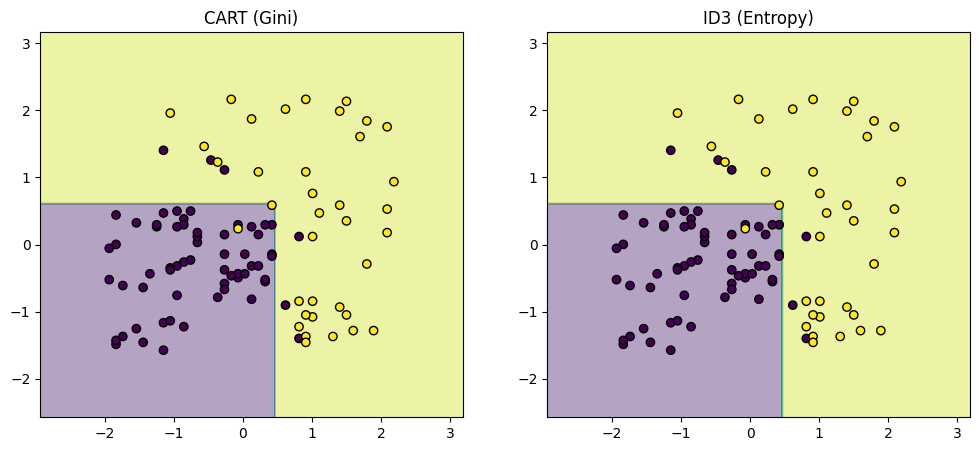

In [12]:
def plot_boundary(model, X, y, title, ax):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

plot_boundary(cart_best, X_test, y_test, "CART (Gini)", axes[0])
plot_boundary(id3_best, X_test, y_test, "ID3 (Entropy)", axes[1])

plt.show()


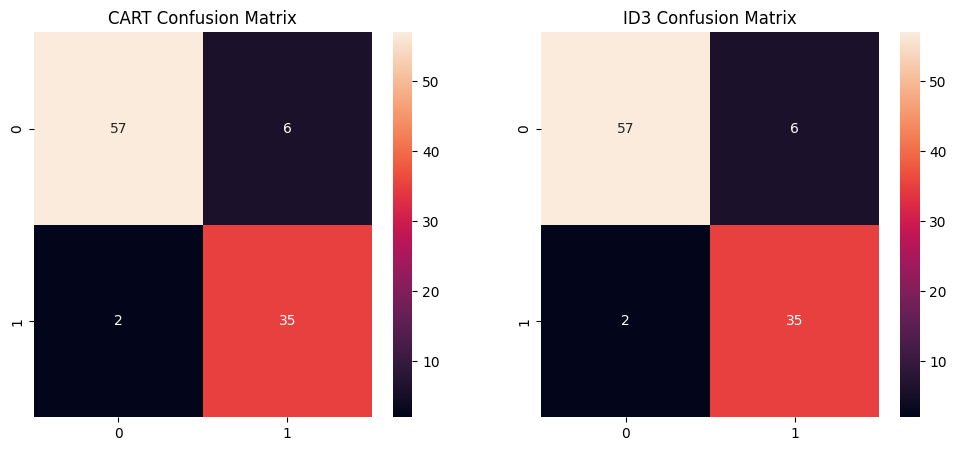

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, cart_pred), annot=True, fmt='d', ax=axes[0])
axes[0].set_title("CART Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, id3_pred), annot=True, fmt='d', ax=axes[1])
axes[1].set_title("ID3 Confusion Matrix")

plt.show()


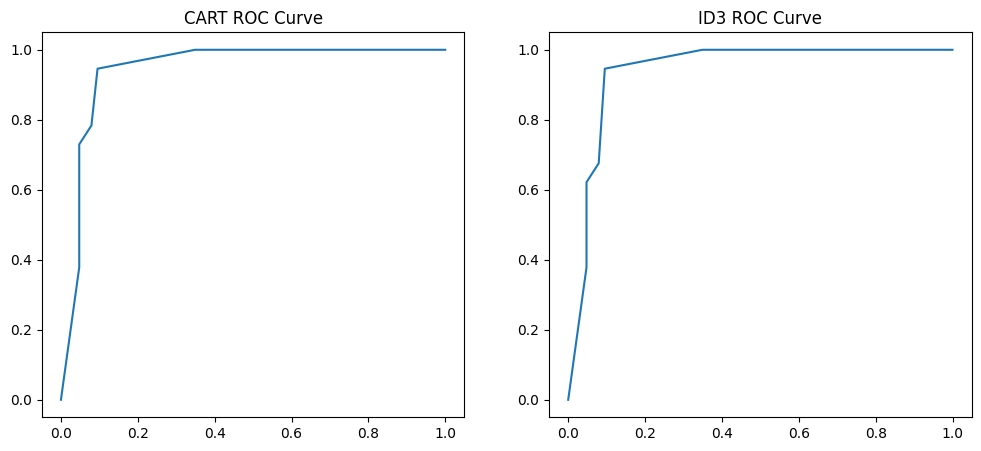

In [14]:
cart_fpr, cart_tpr, _ = roc_curve(y_test, cart_prob)
id3_fpr, id3_tpr, _ = roc_curve(y_test, id3_prob)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].plot(cart_fpr, cart_tpr)
axes[0].set_title("CART ROC Curve")

axes[1].plot(id3_fpr, id3_tpr)
axes[1].set_title("ID3 ROC Curve")

plt.show()


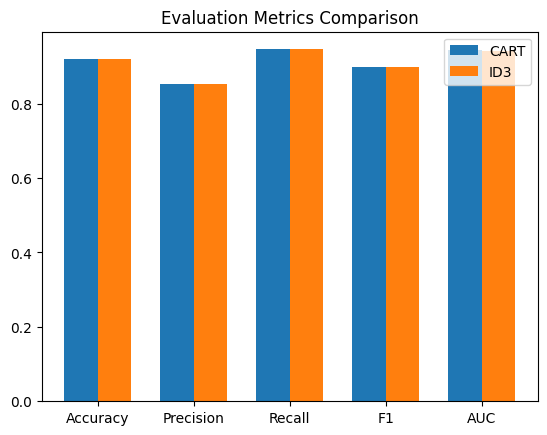

In [15]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

cart_scores = [
    accuracy_score(y_test, cart_pred),
    precision_score(y_test, cart_pred),
    recall_score(y_test, cart_pred),
    f1_score(y_test, cart_pred),
    roc_auc_score(y_test, cart_prob)
]

id3_scores = [
    accuracy_score(y_test, id3_pred),
    precision_score(y_test, id3_pred),
    recall_score(y_test, id3_pred),
    f1_score(y_test, id3_pred),
    roc_auc_score(y_test, id3_prob)
]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, cart_scores, width, label='CART')
plt.bar(x + width/2, id3_scores, width, label='ID3')

plt.xticks(x, metrics)
plt.legend()
plt.title("Evaluation Metrics Comparison")
plt.show()


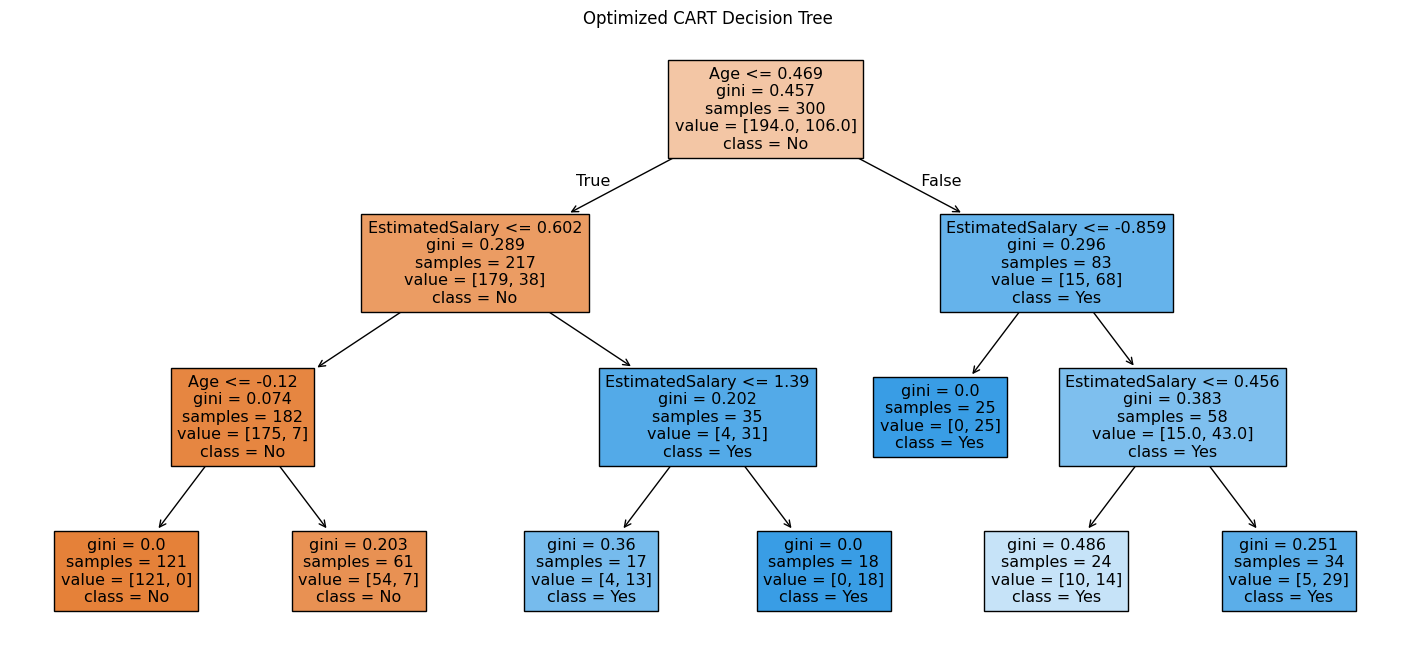

In [16]:
plt.figure(figsize=(18,8))
plot_tree(
    cart_best,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['No', 'Yes'],
    filled=True
)
plt.title("Optimized CART Decision Tree")
plt.show()
